In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
## READ DATA FROM SQLITE TO CSV 
# import sqlite3
# # Create a SQL connection to our SQLite database
# con = sqlite3.connect("FPA_FOD_20170508.sqlite")
# df = pd.read_sql_query("SELECT * FROM Fires", con)
# df.head()
# df.to_csv("fireData.csv")

## Data Preprocessing

In [6]:
df = pd.read_csv("fireData.csv")

In [7]:
display(df.head())
print(df.columns)
print(df.shape)

,Unnamed: 0,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,...,A,40.036944,-121.005833,5.0,USFS,CA,63,63.0,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,A,38.933056,-120.404444,5.0,USFS,CA,61,61.0,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,17.0,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,A,38.559167,-119.913333,5.0,USFS,CA,3,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,A,38.559167,-119.933056,5.0,USFS,CA,3,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


Index(['Unnamed: 0', 'OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE',
       'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')
(1880465, 40)


In [51]:
# Drop unmeaningful/unnecessary columns
drop_cols = ["SOURCE_SYSTEM_TYPE", "SOURCE_SYSTEM", "NWCG_REPORTING_AGENCY",
            "NWCG_REPORTING_UNIT_ID", "NWCG_REPORTING_UNIT_NAME", 
             "SOURCE_REPORTING_UNIT", "SOURCE_REPORTING_UNIT_NAME", 
             "FIRE_CODE", "FIRE_NAME", "LOCAL_FIRE_REPORT_ID", "LOCAL_INCIDENT_ID", 
             "MTBS_FIRE_NAME", "ICS_209_INCIDENT_NUMBER", "ICS_209_NAME", 
             "MTBS_ID", "COMPLEX_NAME", "CONT_TIME", "CONT_DATE", "DISCOVERY_DATE"]

In [52]:
smaller_df = df.drop(drop_cols, axis=1)
print(smaller_df.columns)
print(smaller_df.shape)

Index(['Unnamed: 0', 'OBJECTID', 'FOD_ID', 'FPA_ID', 'FIRE_YEAR',
       'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STAT_CAUSE_CODE',
       'STAT_CAUSE_DESCR', 'CONT_DOY', 'FIRE_SIZE', 'FIRE_SIZE_CLASS',
       'LATITUDE', 'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')
(1880465, 21)


In [53]:
smaller_df.isnull().sum()

Unnamed: 0               0
OBJECTID                 0
FOD_ID                   0
FPA_ID                   0
FIRE_YEAR                0
DISCOVERY_DOY            0
DISCOVERY_TIME      882638
STAT_CAUSE_CODE          0
STAT_CAUSE_DESCR         0
CONT_DOY            891531
FIRE_SIZE                0
FIRE_SIZE_CLASS          0
LATITUDE                 0
LONGITUDE                0
OWNER_CODE               0
OWNER_DESCR              0
STATE                    0
COUNTY              678148
FIPS_CODE           678148
FIPS_NAME           678148
Shape                    0
dtype: int64

In [59]:
data = smaller_df.dropna(axis=0, how='any')
data.shape

(597998, 21)

## EDA 

In [2]:
data = pd.read_csv("finalFires.csv")

/Users/melindading/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
print(data.columns)
data.head()

Index(['Unnamed: 0', 'FOD_ID', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE',
       'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY', 'FIPS_CODE',
       'FIPS_NAME', 'FIRE_TIME'],
      dtype='object')


,Unnamed: 0,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,FIRE_TIME
0,0,1,2005,2005-02-02,33,1300.0,9.0,Miscellaneous,2005-02-02,33.0,...,A,40.036944,-121.005833,5.0,USFS,CA,63,63.0,Plumas,0.0
1,1,2,2004,2004-05-12,133,845.0,1.0,Lightning,2004-05-12,133.0,...,A,38.933056,-120.404444,5.0,USFS,CA,61,61.0,Placer,0.0
2,2,3,2004,2004-05-31,152,1921.0,5.0,Debris Burning,2004-05-31,152.0,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,17.0,El Dorado,0.0
3,3,4,2004,2004-06-28,180,1600.0,1.0,Lightning,2004-07-03,185.0,...,A,38.559167,-119.913333,5.0,USFS,CA,3,3.0,Alpine,5.0
4,4,5,2004,2004-06-28,180,1600.0,1.0,Lightning,2004-07-03,185.0,...,A,38.559167,-119.933056,5.0,USFS,CA,3,3.0,Alpine,5.0


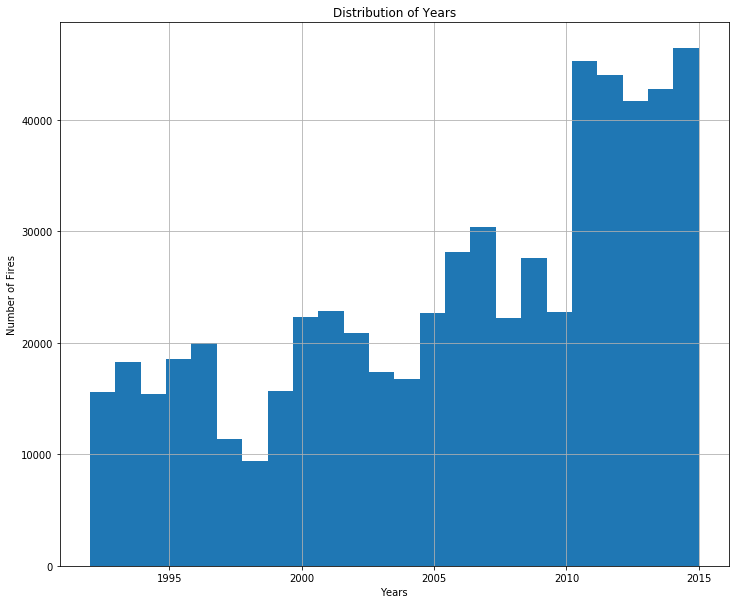

In [10]:
# Visualize the distribution of years 
data['FIRE_YEAR'].hist(bins=24, figsize=(12,10));
plt.title("Distribution of Years");
plt.ylabel("Number of Fires");
plt.xlabel("Years");

We see that a majority of the data is from recent years. This could be due to better technology and notekeeping. 

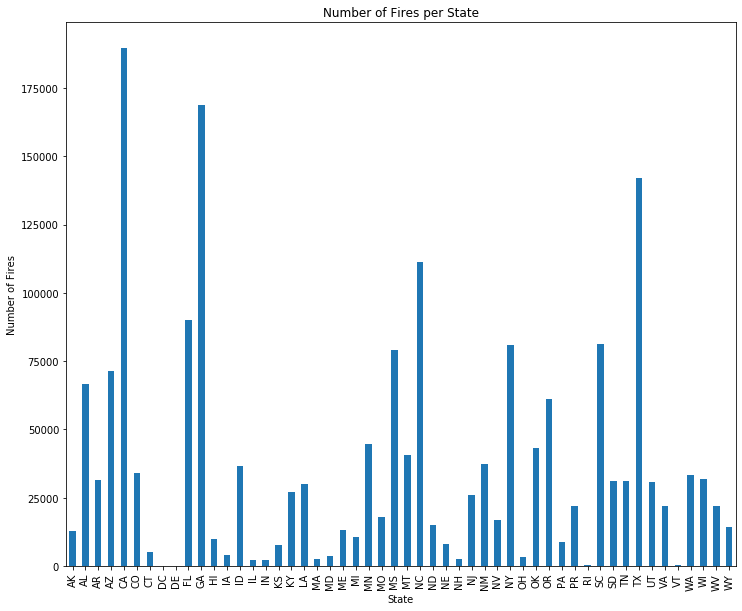

In [11]:
# Number of fires per state from 1992 - 2015
stateCounts = df.groupby(['STATE']).size()
stateCounts.plot.bar(figsize=(12,10));
plt.xticks(rotation=90);
plt.title("Number of Fires per State");
plt.ylabel("Number of Fires");
plt.xlabel("State");

We see that California has had the most wildfires, with Georgia with the second highest and Texas is third. 

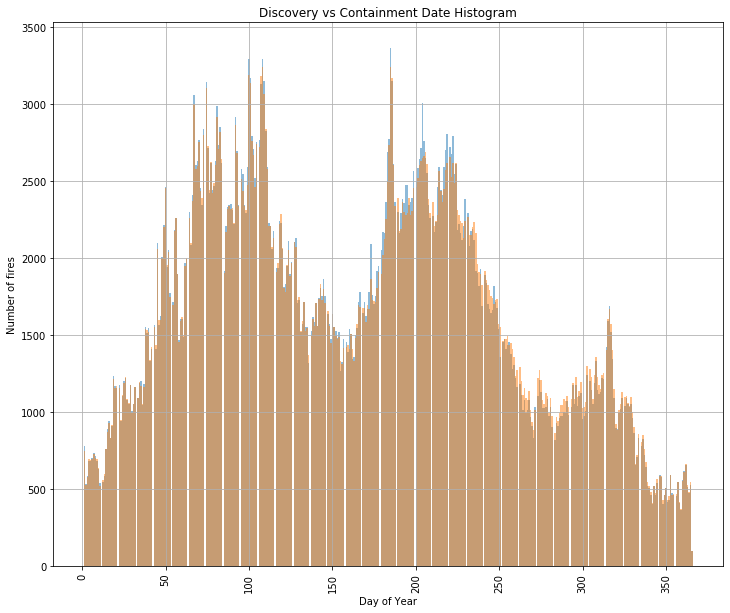

In [12]:
# Plot of Discovery Data vs Contained Date 
data['DISCOVERY_DOY'].hist(bins=400, figsize=(12,10), alpha=0.5);
data['CONT_DOY'].hist(bins=400, figsize=(12,10), alpha=0.5);
plt.xticks(rotation=90);
plt.title("Discovery vs Containment Date Histogram");
plt.ylabel("Number of fires");
plt.xlabel("Day of Year");

We see that most fires are contained within a few days of it starting. There is a bit of a gap in day 200 - 300, which may be the late summer time of the year. 

In [3]:
data['FIRE_TIME'] = data['CONT_DOY'] - data['DISCOVERY_DOY']

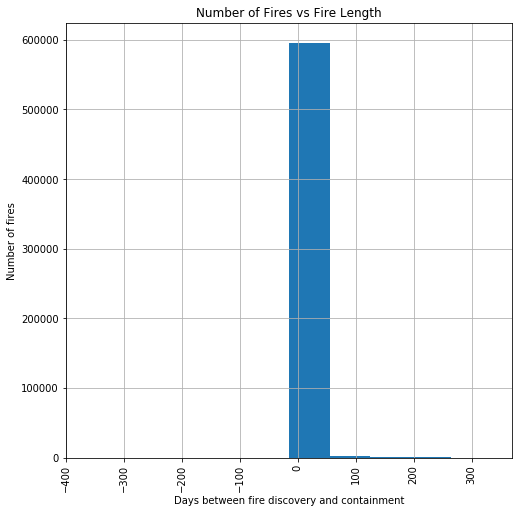

In [4]:
data['FIRE_TIME'].hist(bins=10, figsize=(8,8));
plt.xticks(rotation=90);
plt.title("Number of Fires vs Fire Length");
plt.ylabel("Number of fires");
plt.xlabel("Days between fire discovery and containment");

## Model 

In [32]:
model_df = data.drop(['Unnamed: 0', 'FOD_ID','CONT_DATE', 'DISCOVERY_DATE', 
                      'FIRE_SIZE_CLASS', 'STAT_CAUSE_DESCR','OWNER_DESCR', 
                      'COUNTY', 'FIPS_NAME'], axis=1)
model_df = pd.get_dummies(model_df)
print(model_df.columns)
print(model_df.shape)
model_df.head()

Index(['FIRE_YEAR', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STAT_CAUSE_CODE',
       'CONT_DOY', 'FIRE_SIZE', 'LATITUDE', 'LONGITUDE', 'OWNER_CODE',
       'FIPS_CODE', 'FIRE_TIME', 'STATE_AK', 'STATE_AL', 'STATE_AR',
       'STATE_AZ', 'STATE_CA', 'STATE_CO', 'STATE_CT', 'STATE_DE', 'STATE_FL',
       'STATE_GA', 'STATE_HI', 'STATE_IA', 'STATE_ID', 'STATE_IL', 'STATE_IN',
       'STATE_KS', 'STATE_KY', 'STATE_LA', 'STATE_MA', 'STATE_MD', 'STATE_ME',
       'STATE_MI', 'STATE_MN', 'STATE_MO', 'STATE_MS', 'STATE_MT', 'STATE_NC',
       'STATE_ND', 'STATE_NE', 'STATE_NH', 'STATE_NJ', 'STATE_NM', 'STATE_NV',
       'STATE_NY', 'STATE_OH', 'STATE_OK', 'STATE_OR', 'STATE_PA', 'STATE_PR',
       'STATE_RI', 'STATE_SC', 'STATE_SD', 'STATE_TN', 'STATE_TX', 'STATE_UT',
       'STATE_VA', 'STATE_VT', 'STATE_WA', 'STATE_WI', 'STATE_WV', 'STATE_WY'],
      dtype='object')
(597998, 62)


,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,CONT_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,OWNER_CODE,FIPS_CODE,...,STATE_SD,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY
0,2005,33,1300.0,9.0,33.0,0.10,40.036944,-121.005833,5.0,63.0,...,0,0,0,0,0,0,0,0,0,0
1,2004,133,845.0,1.0,133.0,0.25,38.933056,-120.404444,5.0,61.0,...,0,0,0,0,0,0,0,0,0,0
2,2004,152,1921.0,5.0,152.0,0.10,38.984167,-120.735556,13.0,17.0,...,0,0,0,0,0,0,0,0,0,0
3,2004,180,1600.0,1.0,185.0,0.10,38.559167,-119.913333,5.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4,2004,180,1600.0,1.0,185.0,0.10,38.559167,-119.933056,5.0,3.0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
from sklearn. 

X = model_df.drop(['FIRE_SIZE'], axis=1)
y = model_df[['FIRE_SIZE']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(418598, 61)
(179400, 61)
(418598, 1)
(179400, 1)


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

lgr = LinearRegression().fit(X_train, y_train)
ypred = lgr.predict(X_test)
mean_squared_error(y_test, ypred)

6622025.004806538

In [ ]:
# PLOT COEFFICIENTS
# Plot scatterplot matrix 
# implement L1 and L2 regression 